In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Fraud_Data.csv')

In [3]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
df.shape

(151112, 11)

### Step1: exploratory data visualizations with original features

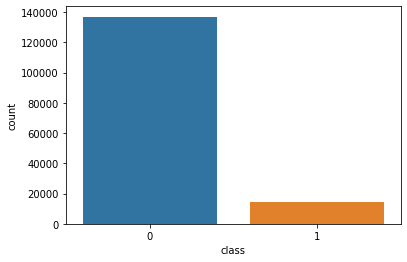

In [5]:
sns.countplot(df['class'])
# imbalanced data set

In [6]:
df['class'].describe() #fraud rate = 9.3% 

count    151112.000000
mean          0.093646
std           0.291336
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: class, dtype: float64

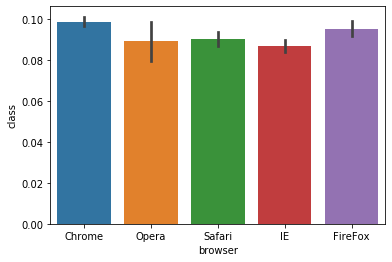

In [7]:
sns.barplot('browser','class',data =df)
# different browsers have similar fraud rate

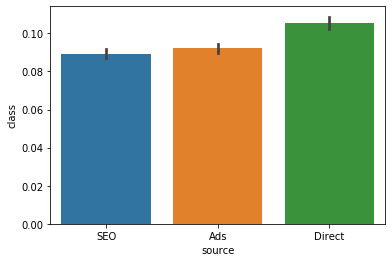

In [8]:
sns.barplot('source','class',data =df)
#Direct source has a higher fraud rate

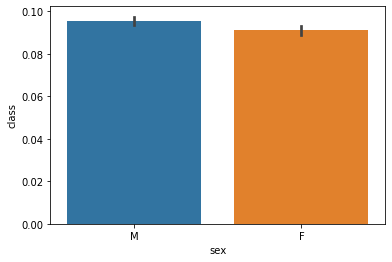

In [9]:
sns.barplot('sex','class',data =df)
# male has a slightly higher fraud rate 

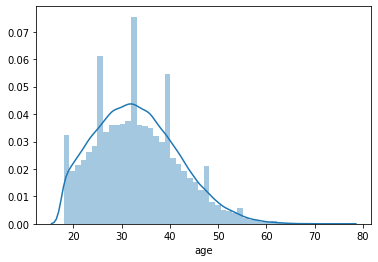

In [10]:
sns.distplot(df['age'])

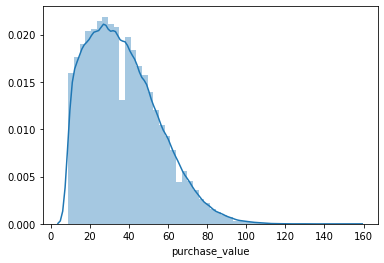

In [11]:
sns.distplot(df['purchase_value'])
# distribution looks normal

In [12]:
df['purchase_value'].max()
# with a most expensive purchase of $154

154

### Step 2 (Question 1): determine the country of each IP address

In [13]:
df_IP = pd.read_csv('IpAddress_to_Country.csv')

In [14]:
df_IP.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [15]:
# check how many different countreis are listed in df_IP
df_IP['country'].value_counts()

United States         46868
Canada                 6989
Russian Federation     6739
Australia              6316
Germany                5999
                      ...  
Mayotte                   1
Comoros                   1
Eritrea                   1
Marshall Islands          1
Tuvalu                    1
Name: country, Length: 235, dtype: int64

In [16]:
#given the ip_address in df, find the country in df_IP
countries = []
for i in range(len(df)):
    ip_address = df['ip_address'].iloc[i]
    tmp = df_IP[(df_IP['lower_bound_ip_address'] <= ip_address) &
                          (df_IP['upper_bound_ip_address'] >= ip_address)]
    if len(tmp) ==1:
        countries.append(tmp['country'].values[0])
    else: 
        countries.append('NA')
df['country'] = countries

In [17]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


## Question 1 Conclusion: country names are listed in the 'country' column in the DataFrame above

In [18]:
df_NA = df[df['country'] == 'NA']
df_NA
# country origin of 21966 rows were not found in df_IP, suggesting a possible fake IP? 
# next step is to check how many idential IP addresses are in these 21966 rows 

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,NA
11,73884,2015-05-29 16:22:02,2015-06-16 05:45:58,58,ZTZZJUCRDOCJZ,Direct,Chrome,M,32,4.038285e+09,0,NA
12,79203,2015-06-16 21:19:35,2015-06-21 03:29:59,18,IBPNKSMCKUZWD,SEO,Safari,M,33,4.161541e+09,0,NA
14,82931,2015-02-16 02:50:30,2015-04-16 00:56:47,15,XKIFNYUZMBWFU,SEO,IE,M,24,4.203488e+09,0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...
151084,364012,2015-04-08 06:34:11,2015-07-07 16:57:37,52,HHOFFWETPEJWD,SEO,Chrome,M,44,3.995197e+09,0,NA
151096,27502,2015-04-14 23:43:03,2015-06-24 10:42:00,43,PYCNPZMYIETTA,Direct,Opera,F,30,4.202836e+09,0,NA
151098,318557,2015-04-10 01:36:49,2015-05-14 07:17:23,55,QYTSTAJZSKDGD,Ads,Chrome,F,49,3.890144e+09,0,NA
151100,313804,2015-02-07 14:31:07,2015-03-02 19:20:25,48,KEVINKEAJOSXJ,SEO,FireFox,F,31,4.251103e+09,0,NA


In [19]:
df_NAoccurance = df_NA['ip_address'].value_counts()
df_NAoccurance = df_NAoccurance[df_NAoccurance>5]
df_NAoccurance.index
# these Ip addresses appeared more than 5 times and have no countires assigned, which are suspicious 

Float64Index([  3874757617.26129,   183974753.225656,   2141691947.61474,
                4149333595.43826,   3828716001.83371,    2278095.8173399,
                3820047641.00664,   4102435168.56565,   4081075207.35052,
              178953067.13044098,   4014285529.96041,   3768519420.84358,
              4154109666.2434297,   3904575348.81605, 3995823223.8616295,
              2893226913.3034897,   3874175296.76085,   4100004971.49175,
              4155532702.8265705, 3844702994.6425295,   3872015077.60445,
                4246268468.32846, 4084532666.7147603,     4262694823.865,
              4143445567.9259295,   4154669703.43661,   176583066.467017,
                4279796410.56051,    3920751639.0589,   3869147547.38083,
                4095196690.25101, 3855235971.0108104,   3785879484.74634,
              4248426694.3951297, 4182417969.6498704,   3969919301.94859,
              16669225.674405402, 3802159634.2486296, 4229759354.6288795,
              3902837711.2985296, 3944

### Step 3: Feature Engineering

#### 1) deriving a new feature country_na: 1 - IP addresses which appeared more than 5 times and no country name assigned; 0 - the rest

In [20]:
df['country_na'] = np.where(df['ip_address'].isin(df_NAoccurance.index), 1, 0)

In [21]:
df['country_na'].describe()

count    151112.000000
mean          0.006882
std           0.082674
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: country_na, dtype: float64

#### 2) deriving a new feature time_diff based on purchase_time and signup_time 

In [22]:
# get the time gap between signup and purchase 
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df['time_diff'] = df['purchase_time'] - df['signup_time']

In [23]:
#get the time_diff into total seconds
df['time_diff_seconds'] = df['time_diff'].apply(lambda x: x.total_seconds()) 

In [24]:
df['time_diff_seconds'].value_counts().sort_index().head(10)

1.0      7600
137.0       1
248.0       1
312.0       1
438.0       1
613.0       1
728.0       1
769.0       1
806.0       1
865.0       1
Name: time_diff_seconds, dtype: int64

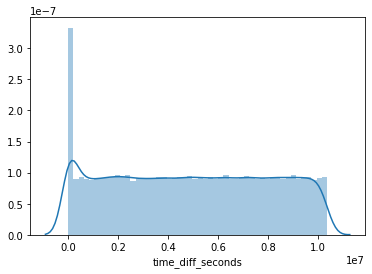

In [25]:
sns.distplot(df['time_diff_seconds'])

In [26]:
df[df['time_diff_seconds'] < 86400]
# there are 8758 purchases that were made within 1 day after signup

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,country_na,time_diff,time_diff_seconds
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,0,04:59:04,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0,00:00:01,1.0
24,171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,Direct,IE,F,35,1.120619e+09,1,United States,0,00:00:01,1.0
29,151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1,United States,0,00:00:01,1.0
64,181004,2015-01-07 17:45:16,2015-01-07 17:45:17,10,WETYPHOQVLWMK,Ads,FireFox,M,36,2.293333e+09,1,United States,0,00:00:01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151036,330098,2015-01-03 12:52:15,2015-01-03 12:52:16,38,EZENSUHMPLOIW,Ads,Chrome,M,27,2.152700e+08,1,United States,0,00:00:01,1.0
151082,305464,2015-01-07 09:06:55,2015-01-07 09:06:56,90,TVYSUZLTILQQN,SEO,IE,M,34,3.067794e+09,1,Korea Republic of,0,00:00:01,1.0
151099,115473,2015-01-01 07:26:14,2015-01-01 07:26:15,61,ZRHCEVZHNIBJH,Direct,IE,M,24,3.003296e+09,1,Chile,0,00:00:01,1.0
151103,5557,2015-01-04 23:03:04,2015-01-04 23:03:05,27,AWFGZTEHXMWEJ,Direct,Chrome,M,39,3.306999e+09,1,Tunisia,0,00:00:01,1.0


In [27]:
# plot out the daily sales, and check any abnormality 
import datetime as dt
df['purchase_date'] = df['purchase_time'].dt.to_period('D')

In [28]:
#df_DS
df_DS = df.groupby('purchase_date').sum()['purchase_value']
df_DS

purchase_date
2015-01-01    19411
2015-01-02    27412
2015-01-03    20503
2015-01-04    21311
2015-01-05    21589
              ...  
2015-12-12      606
2015-12-13      654
2015-12-14      247
2015-12-15       93
2015-12-16       57
Freq: D, Name: purchase_value, Length: 350, dtype: int64

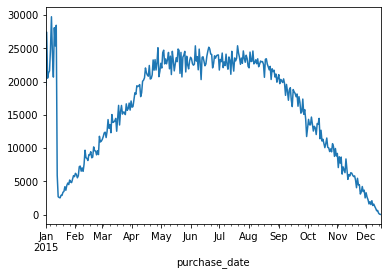

In [29]:
df_DS.plot()
# strange behavior in early Jan

In [30]:
df_DS.idxmax()
#2015-01-07 looks like lots of frauds, check the details 

Period('2015-01-07', 'D')

In [31]:
df[df['purchase_date'] == '2015-01-07']

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,country_na,time_diff,time_diff_seconds,purchase_date
29,151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1,United States,0,00:00:01,1.0,2015-01-07
64,181004,2015-01-07 17:45:16,2015-01-07 17:45:17,10,WETYPHOQVLWMK,Ads,FireFox,M,36,2.293333e+09,1,United States,0,00:00:01,1.0,2015-01-07
77,392706,2015-01-07 08:15:53,2015-01-07 08:15:54,65,VRYLIRAQJIIIE,SEO,Opera,F,30,1.213105e+09,1,United States,0,00:00:01,1.0,2015-01-07
175,292922,2015-01-07 11:51:20,2015-01-07 11:51:21,11,LCIDSXJYNIOGD,SEO,IE,M,30,1.447880e+09,1,France,0,00:00:01,1.0,2015-01-07
193,33840,2015-01-07 14:00:20,2015-01-07 14:00:21,32,NPZFSQBLEKLTN,SEO,Chrome,F,28,3.828716e+09,1,NA,1,00:00:01,1.0,2015-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150101,320857,2015-01-07 04:24:29,2015-01-07 04:24:30,60,EVJECOFJOKOAS,SEO,Chrome,M,28,3.182244e+09,1,Mexico,0,00:00:01,1.0,2015-01-07
150147,314457,2015-01-07 03:11:43,2015-01-07 03:11:44,46,ISEPGXWJMDUNM,SEO,Chrome,F,45,1.587727e+09,1,Italy,0,00:00:01,1.0,2015-01-07
150465,286145,2015-01-07 18:28:25,2015-01-07 18:28:26,30,HIBHLJHIVPMDC,Ads,Chrome,F,22,2.107046e+08,1,United States,0,00:00:01,1.0,2015-01-07
150978,357406,2015-01-07 16:58:01,2015-01-07 16:58:02,15,BWSMVSLCJXMCM,Direct,IE,F,39,2.937899e+09,1,Japan,0,00:00:01,1.0,2015-01-07


In [32]:
df[df['purchase_date'] == '2015-01-07']['time_diff_seconds'].value_counts().head(10)
#this day has 750 purchases that were made 1s after sign up,accounting for a 10% of the total number of within 1s purchase, \
#suggesting fraud behavior 

1.0         750
444131.0      1
538629.0      1
430597.0      1
381980.0      1
217363.0      1
87057.0       1
341086.0      1
128410.0      1
269435.0      1
Name: time_diff_seconds, dtype: int64

#### 2015-01-07 has 750 purchases that were made 1s after sign up,accounting for a 10% of the total number of within 1s purchase, suggesting fraud behavior. time_diff_seconds is definitely an important feature predicting fraud

In [33]:
# check if there are many users using the same device, which could be suspicious 
df_device = df['device_id'].value_counts()
df_device 

ZUSVMDEZRBDTX    20
ITUMJCKWEYNDD    20
KIPFSCNUGOLDP    20
CQTUVBYIWWWBC    20
EQYVNEGOFLAWK    20
                 ..
APKHQJAXXGNLE     1
FQSKZRNLWUALE     1
KAJBZOLCVMLPK     1
LNZMWQSXEFNAN     1
YBCFVGAHMAHCE     1
Name: device_id, Length: 137956, dtype: int64

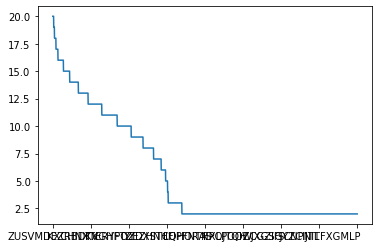

In [34]:
df_device[:2000].plot()

### divide device_id into three catagories depending on the total times of being used
###  2 (below 5 times), 1 (5-15 times), 0 (15-20 times)

In [35]:
index1 = df_device[df_device>=15].index
len(index1)

111

In [36]:
index2 = df_device[(df_device < 15) & (df_device >5)].index
len(index2)

630

In [37]:
index3 = df_device[df_device <=5].index
len(index3)

137215

In [38]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,country_na,time_diff,time_diff_seconds,purchase_date
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,0,52 days 03:51:22,4506682.0,2015-04-18
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,0,0 days 04:59:04,17944.0,2015-06-08
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0,0 days 00:00:01,1.0,2015-01-01
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,0,5 days 16:41:25,492085.0,2015-05-04
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,0,50 days 11:31:01,4361461.0,2015-09-09


In [39]:
device_id = []
for i in range(len(df)):
    if df['device_id'].iloc[i] in index1:
        device_id.append(0)
    elif df['device_id'].iloc[i] in index2:
        device_id.append(1)
    else: 
        device_id.append(2)
df['device_id_Three'] = device_id

In [40]:
df[df['device_id_Three'] == 0]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,country_na,time_diff,time_diff_seconds,purchase_date,device_id_Three
83,67592,2015-01-10 23:23:25,2015-01-10 23:23:26,38,ITUMJCKWEYNDD,Ads,Safari,M,43,3.874758e+09,1,NA,1,0 days 00:00:01,1.0,2015-01-10,0
134,104061,2015-01-05 00:09:57,2015-01-05 00:09:58,23,XSEQHFFOYFICY,SEO,IE,M,33,2.011989e+09,1,Hong Kong,0,0 days 00:00:01,1.0,2015-01-05,0
190,170138,2015-01-08 09:32:59,2015-01-08 09:33:00,14,GTIYVLCMAYBFA,Ads,FireFox,M,39,2.141692e+09,1,NA,1,0 days 00:00:01,1.0,2015-01-08,0
193,33840,2015-01-07 14:00:20,2015-01-07 14:00:21,32,NPZFSQBLEKLTN,SEO,Chrome,F,28,3.828716e+09,1,NA,1,0 days 00:00:01,1.0,2015-01-07,0
219,334731,2015-01-08 23:28:13,2015-01-08 23:28:14,17,AYUBPYPDVZUPK,Ads,IE,M,29,1.045057e+09,1,Greece,0,0 days 00:00:01,1.0,2015-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150619,67350,2015-08-10 14:34:34,2015-11-27 00:49:35,60,ECSJFQBUBSKDH,SEO,Chrome,M,19,1.696626e+09,0,China,0,108 days 10:15:01,9368101.0,2015-11-27,0
150756,164880,2015-01-02 19:44:47,2015-01-02 19:44:48,49,IXNWEKWJGNLNH,SEO,Safari,M,19,2.171613e+09,1,United States,0,0 days 00:00:01,1.0,2015-01-02,0
150763,64352,2015-01-11 09:32:54,2015-01-11 09:32:55,20,EBIXBHKGUHCZE,SEO,Chrome,F,18,3.820048e+09,1,NA,1,0 days 00:00:01,1.0,2015-01-11,0
150797,75490,2015-01-04 17:22:38,2015-01-04 17:22:39,71,RWZCXZTQUORQL,Direct,Chrome,M,45,1.281304e+09,1,United States,0,0 days 00:00:01,1.0,2015-01-04,0


### convert catagorical to numertical 

In [41]:
df = pd.get_dummies(columns =['sex','source','browser'],data =df, drop_first = True)

In [42]:
df.drop('device_id',axis=1,inplace=True)

In [43]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class,country,country_na,time_diff,time_diff_seconds,purchase_date,device_id_Three,sex_M,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,39,7.327584e+08,0,Japan,0,52 days 03:51:22,4506682.0,2015-04-18,2,1,0,1,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,53,3.503114e+08,0,United States,0,0 days 04:59:04,17944.0,2015-06-08,2,0,0,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,53,2.621474e+09,1,United States,0,0 days 00:00:01,1.0,2015-01-01,1,1,0,1,0,0,1,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,41,3.840542e+09,0,NA,0,5 days 16:41:25,492085.0,2015-05-04,2,1,0,1,0,0,0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,45,4.155831e+08,0,United States,0,50 days 11:31:01,4361461.0,2015-09-09,2,1,0,0,0,0,0,1


In [44]:
df['country'].value_counts().head(10)

United States        58049
NA                   21966
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Name: country, dtype: int64

In [45]:
df['country'].value_counts().index[:10]

Index(['United States', 'NA', 'China', 'Japan', 'United Kingdom',
       'Korea Republic of', 'Germany', 'France', 'Canada', 'Brazil'],
      dtype='object')

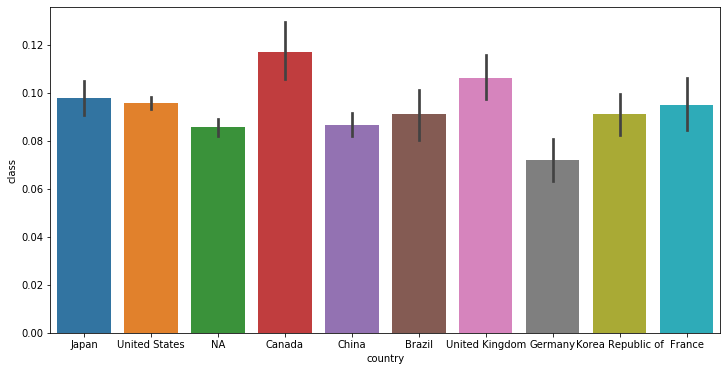

In [46]:
#check if certain country (top total fraud cases) has a higher fraud rate
plt.figure(figsize=(12,6))
sns.barplot('country','class', data = df[df['country'].isin(df['country'].value_counts().index[:10])])

In [47]:
#40 countries which have the highest fraud rate (10%)
Top40Countreis = df.groupby('country').mean()['class'].sort_values(ascending = False).head(40).index

In [48]:
#divide the country column into 2 catagories (high fraud rate - 0, the rest - 1)
df['country'] = np.where(df['country'].isin(Top40Countreis), 0, 1)

In [49]:
df['country'].value_counts()

1    138678
0     12434
Name: country, dtype: int64

In [50]:
#Jan-01-01 to 01-13 have very high fraud rate
df.groupby('purchase_date').mean()['class'].sort_values(ascending = False).head(40)

purchase_date
2015-01-01    0.998249
2015-01-02    0.985054
2015-01-03    0.982079
2015-01-04    0.965571
2015-01-05    0.961938
2015-01-06    0.961059
2015-01-07    0.960358
2015-01-08    0.940320
2015-01-11    0.925414
2015-01-12    0.921788
2015-01-10    0.920777
2015-01-09    0.914858
2015-01-13    0.585366
2015-12-09    0.116279
2015-01-16    0.115942
2015-12-10    0.114286
2015-01-30    0.084848
2015-11-14    0.083871
2015-12-02    0.082192
2015-12-05    0.081633
2015-11-28    0.081633
2015-12-01    0.079545
2015-12-06    0.076923
2015-01-17    0.075949
2015-11-09    0.075145
2015-03-05    0.075000
2015-02-24    0.072727
2015-12-13    0.071429
2015-05-07    0.070147
2015-11-17    0.069620
2015-11-27    0.069565
2015-10-07    0.069364
2015-01-20    0.069307
2015-09-12    0.067864
2015-01-14    0.066667
2015-03-07    0.066313
2015-11-16    0.065476
2015-06-28    0.065183
2015-07-29    0.063733
2015-07-12    0.063077
Freq: D, Name: class, dtype: float64

In [51]:
TopDates = df.groupby('purchase_date').mean()['class'].sort_values(ascending = False).head(13).index
TopDates

PeriodIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
             '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
             '2015-01-11', '2015-01-12', '2015-01-10', '2015-01-09',
             '2015-01-13'],
            dtype='period[D]', name='purchase_date', freq='D')

In [52]:
#divide the 'purchase_date' column into 2 catagories (high fraud rate - 0, the rest - 1)
df['purchase_date'] = np.where(df['purchase_date'].isin(TopDates), 0, 1)

In [53]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class,country,country_na,time_diff,time_diff_seconds,purchase_date,device_id_Three,sex_M,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,39,7.327584e+08,0,1,0,52 days 03:51:22,4506682.0,1,2,1,0,1,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,53,3.503114e+08,0,1,0,0 days 04:59:04,17944.0,1,2,0,0,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,53,2.621474e+09,1,1,0,0 days 00:00:01,1.0,0,1,1,0,1,0,0,1,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,41,3.840542e+09,0,1,0,5 days 16:41:25,492085.0,1,2,1,0,1,0,0,0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,45,4.155831e+08,0,1,0,50 days 11:31:01,4361461.0,1,2,1,0,0,0,0,0,1


In [54]:
df.corr()['class']

user_id              0.001945
purchase_value       0.001011
age                  0.006624
ip_address          -0.005208
class                1.000000
country             -0.047084
country_na           0.233981
time_diff_seconds   -0.257888
purchase_date       -0.693729
device_id_Three     -0.641899
sex_M                0.007639
source_Direct        0.020285
source_SEO          -0.012251
browser_FireFox      0.002299
browser_IE          -0.013363
browser_Opera       -0.002395
browser_Safari      -0.005222
Name: class, dtype: float64

In [55]:
X = df.drop(['user_id','signup_time','purchase_time','class','time_diff'], axis=1)
y = df['class']

In [56]:
X.shape

(151112, 15)

In [57]:
X.head()

,purchase_value,age,ip_address,country,country_na,time_diff_seconds,purchase_date,device_id_Three,sex_M,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,34,39,7.327584e+08,1,0,4506682.0,1,2,1,0,1,0,0,0,0
1,16,53,3.503114e+08,1,0,17944.0,1,2,0,0,0,0,0,0,0
2,15,53,2.621474e+09,1,0,1.0,0,1,1,0,1,0,0,1,0
3,44,41,3.840542e+09,1,0,492085.0,1,2,1,0,1,0,0,0,1
4,39,45,4.155831e+08,1,0,4361461.0,1,2,1,0,0,0,0,0,1


In [58]:
y.shape

(151112,)

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
X_train = scaler.fit_transform(X_train)

In [64]:
X_test = scaler.transform(X_test)

### Build a quick model - LogisticRegression

In [65]:
from sklearn.linear_model import LogisticRegression 

In [66]:
LR = LogisticRegression()

In [67]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
pred = LR.predict(X_test)

In [70]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41222
           1       0.92      0.53      0.68      4112

    accuracy                           0.95     45334
   macro avg       0.94      0.76      0.83     45334
weighted avg       0.95      0.95      0.95     45334



### KNN model 

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier()

In [73]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
pred_knn = knn.predict(X_test)
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41222
           1       0.96      0.53      0.68      4112

    accuracy                           0.96     45334
   macro avg       0.96      0.76      0.83     45334
weighted avg       0.96      0.96      0.95     45334



In [75]:
print(confusion_matrix(y_test,pred_knn))

[[41130    92]
 [ 1927  2185]]


### Random Forest Model 

In [76]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [77]:
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
pred_RF = RF.predict(X_test)

In [79]:
print(classification_report(y_test,pred_RF))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41222
           1       1.00      0.53      0.69      4112

    accuracy                           0.96     45334
   macro avg       0.98      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



In [80]:
df_FeatureImportance = pd.DataFrame({'Feature': X.columns, 'Importance': RF.feature_importances_})
df_FeatureImportance.sort_values('Importance', ascending = False)

,Feature,Importance
5,time_diff_seconds,0.314429
7,device_id_Three,0.174707
6,purchase_date,0.160942
2,ip_address,0.147477
0,purchase_value,0.090455
1,age,0.074060
4,country_na,0.010764
8,sex_M,0.006366
12,browser_IE,0.004123
14,browser_Safari,0.003787


## Question 3: What kinds of users are more likely to be classified as at risk?
### The most important features are: 1) time_diff_seconds - time in second the purchase is made after sign up; 2) device_id_Three - number of times the same device is used for the purchase; 3) purchase_date; 4) ip_address - wheather the ip address has a country names assigned to it; 5) purchase value. 
### The following characteristics are more likely to be classified as at risk: purchases made right after sign up, devices that were shared by multiple users for more than 5 purchases, ip addresses that have no country name assigned and are associated with more than 5 purchases

### SVC

In [81]:
from sklearn.svm import SVC

In [82]:
svc = SVC()

In [83]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
pred_svc = svc.predict(X_test)

In [90]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41222
           1       0.99      0.53      0.69      4112

    accuracy                           0.96     45334
   macro avg       0.97      0.76      0.83     45334
weighted avg       0.96      0.96      0.95     45334



In [91]:
print(confusion_matrix(y_test,pred_svc))

[[41206    16]
 [ 1940  2172]]


## Question 2:Build a model to predict whether an activity is fraudulent or not. Explain how different assumptions about the cost of false positives vs false negatives would impact the model.
### The best model (random forest) yields a precision 1.0 and recall 0.53. Precision represents false positives and recall presents false negatives. For fraud detection, minizing false negatives is critical even though it will decrease the precision. Therefore, the decision boundary probably needs to be shifted to improve recall even though precision will be compromised

### Evaluation Metrics for binary classification with svc model 

In [92]:
from sklearn.metrics import roc_curve,precision_recall_curve,roc_curve, auc

In [94]:
y_scores = svc.fit(X_train, y_train).decision_function(X_test)
y_scores_list = list(zip(y_test[0:20], y_scores[0:20]))
y_scores_list  

[(0, -0.999980359846718),
 (0, -1.0002136121154408),
 (0, -0.9998646465482677),
 (0, -1.0001939162461189),
 (0, -1.0001330737445078),
 (0, -1.0002541034640438),
 (0, -0.9998493553669922),
 (0, -1.0000378602725926),
 (0, -1.0001846214896504),
 (1, -0.9998238832294758),
 (0, -1.0001426906749789),
 (1, 2.0649937930917823),
 (0, -1.0002669425734043),
 (0, -0.9998368957932298),
 (0, -1.000300505725387),
 (0, -1.0001933865881372),
 (0, -1.0003208122547749),
 (0, -1.0003633161419245),
 (0, -0.9999108568687554),
 (0, -1.0000517525120969)]

In [95]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

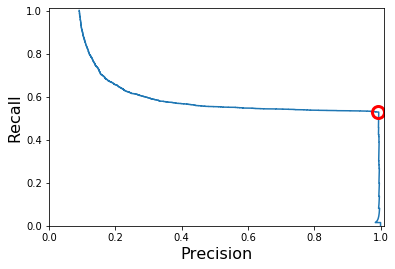

In [96]:
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.show()
# red circle is when the threshold is cloest to zero 

#### The red circle (the result of the SVC model) is when the threshold is cloest to zero. For fraud detection, it is critical to maximize recall = minimize false negatives. But from the precision-recall curve, precision needs to be decreased significantly in order to boost recall

## Question 4: From a product perspective, how would you use the model to predict in real time
### the models were built for a binary classification problem. The recall of the models are not satisfactory, meaning lots of false negatives would happen, which is a very serious problem for fraud prediction. One of the solution for this is set the thresholds to predict three classes - non-fraud, suspicious and Fraud. In the case of suspicious, the user will be put on hold, and a manual inspection will take place. 